#### Vanilla VAE

Demonstrates MNIST reconstruction and hidden variable representation.

In [95]:
%pylab inline
import matplotlib.pyplot as plt
from vanilla_vae import *

Populating the interactive namespace from numpy and matplotlib


#### MNIST Reconstruction

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

data = input_data.read_data_sets('data')
data_dim = data.train.images.shape[1]

enc_h = 128
enc_z = 64
dec_h = 128
max_iters = 5000
batch_size = 100
learning_rate = 0.01

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [3]:
tf.reset_default_graph()

In [7]:
x, e = inputs(data_dim, enc_z)
mu, log_var, z = encoder(x, e, data_dim, enc_h, enc_z)
out_op, out_mu, out_log_var = decoder(z, data_dim, dec_h, enc_z)
loss_op = make_loss(out_op, x, log_var, mu, out_log_var)
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss_op)

sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

In [8]:
x_test, _ = data.test.next_batch(1)
recons = []

for i in xrange(max_iters):
    x_, y_ = data.train.next_batch(batch_size)
    l = train_step(sess, x_, train_op, loss_op, x, e, enc_z)
    if i % 1000 == 0:
        print('iter: %d\tloss: %.2f' % (i, l))
        recons.append(reconstruct(sess, x_test, out_op, x, e, enc_z)[0])

iter: 0	loss: 4658.89
iter: 1000	loss: 371.66
iter: 2000	loss: 317.57
iter: 3000	loss: 305.18
iter: 4000	loss: 292.58


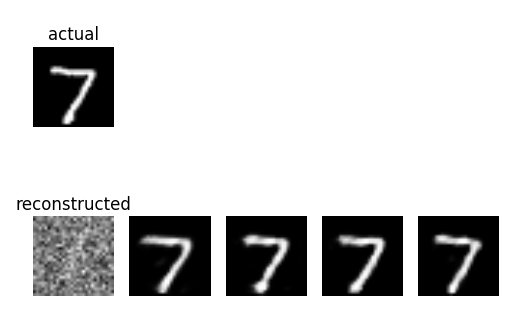

In [9]:
actual = x_test[0]
fig, axs = plt.subplots(2, len(recons))
for i, recon in enumerate(recons):
    axs[0, 0].imshow(actual.reshape(28, 28), cmap='gray')
    axs[1, i].imshow(recon.reshape(28, 28), cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].axis('off')
axs[0, 0].set_title('actual')
axs[1, 0].set_title('reconstructed');

#### Image reconstruction widget

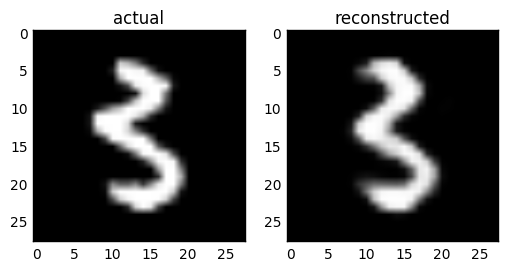

In [10]:
from ipywidgets import interact
n = 1000
images = data.test.next_batch(n)[0]
reconstructed = reconstruct(sess, images, out_op, x, e, enc_z)[0]

def browse(i):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(images[i].reshape(28, 28), cmap='gray')
    axs[1].imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    axs[0].set_title('actual')
    axs[1].set_title('reconstructed')
    plt.show()

interact(browse, i=(0, n-1));

#### Hidden Variable visualization

Train with 2d latent space

In [10]:
tf.reset_default_graph()

In [11]:
data = input_data.read_data_sets('data')
data_dim = data.train.images.shape[1]

enc_h = 128
enc_z = 2
dec_h = 128
max_iters = 10000
batch_size = 100
learning_rate = 0.001

x, e = inputs(data_dim, enc_z)
mu, log_var, z = encoder(x, e, data_dim, enc_h, enc_z)
out_op, out_mu, out_log_var = decoder(z, data_dim, dec_h, enc_z)
loss_op = make_loss(out_op, x, log_var, mu, out_log_var)
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss_op)

sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [12]:
for i in xrange(max_iters):
    x_, y_ = data.train.next_batch(batch_size)
    l = train_step(sess, x_, train_op, loss_op, x, e, enc_z)
    if i % 1000 == 0:
        print('iter: %d\tloss: %.2f' % (i, l))

iter: 0	loss: 4547.46
iter: 1000	loss: 1079.70
iter: 2000	loss: 973.51
iter: 3000	loss: 916.90
iter: 4000	loss: 869.04
iter: 5000	loss: 901.78
iter: 6000	loss: 842.71
iter: 7000	loss: 862.77
iter: 8000	loss: 800.66
iter: 9000	loss: 789.81


Visualizing learned representation space

In [13]:
x_, y_ = data.train.next_batch(5000)
e_ = np.random.normal(size=(x_.shape[0], enc_z))
zs = sess.run(z, feed_dict={x: x_, e: e_})

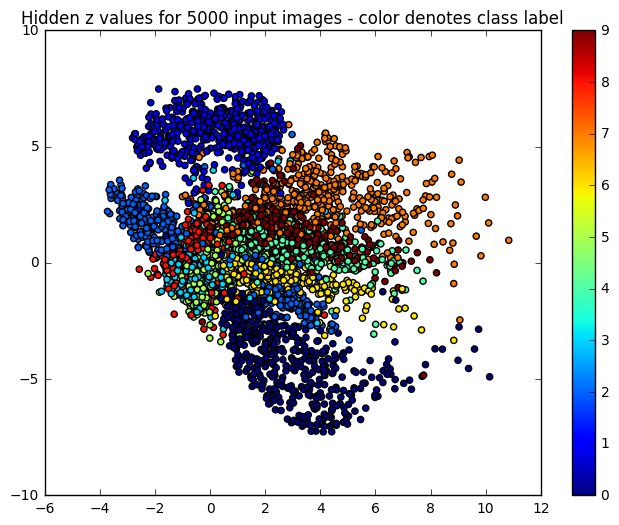

In [14]:
fig = plt.figure(figsize=(8, 6));
plt.scatter(zs[:, 0], zs[:, 1], c=y_)
plt.colorbar();
plt.title('Hidden z values for %d input images - color denotes class label' % x_.shape[0])
plt.show();

Decode images with latent points from across a 2d grid

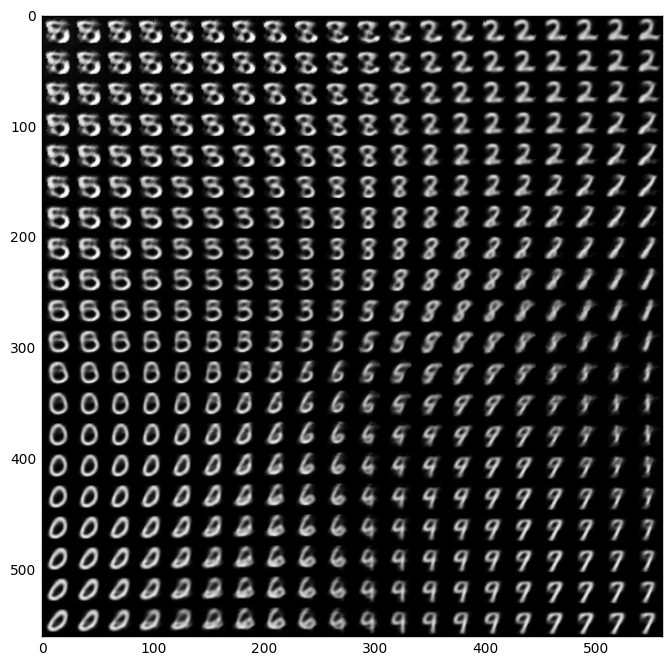

In [15]:
num_x, num_y = 20, 20
x_dom = np.linspace(-3, 3, num_x)
y_dom = np.linspace(-3, 3, num_y)

canvas = np.empty((28*num_x, 28*num_y))
for i, xi in enumerate(x_dom):
    for j, yj in enumerate(y_dom):
        x_hat = sess.run(out_op, feed_dict={z: np.array([[xi, yj]])})
        canvas[28*i:28*(i+1), 28*j:28*(j+1)] = x_hat.reshape(28, 28)

plt.figure(figsize=(8, 8))
plt.imshow(canvas, cmap='gray');

#### Posterior Visualization for 4-datapoint dataset

In [42]:
data = np.array([[-10.,-10.], [-10., 10.], [10., -10.], [10., 10.]])

In [43]:
tf.reset_default_graph()

data_dim = 2

enc_h = 128
enc_z = 2
dec_h = 128
max_iters = 5000
batch_size = 4
learning_rate = 0.001

x, e = inputs(data_dim, enc_z)
mu, log_var, z = encoder(x, e, data_dim, enc_h, enc_z)
out_op, out_mu, out_log_var = decoder(z, data_dim, dec_h, enc_z)
loss_op = make_loss(out_op, x, log_var, mu, out_log_var)
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss_op)

sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

In [44]:
idx = 0
for i in xrange(max_iters):
    x_ = data[idx:idx+batch_size]
    l = train_step(sess, x_, train_op, loss_op, x, e, enc_z)
    idx += batch_size
    if idx >= x_.shape[0]:
        idx = 0
    if i % 1000 == 0:
        print('iter: %d\tloss: %.2f' % (i, l))

iter: 0	loss: 211.01
iter: 1000	loss: 184.92
iter: 2000	loss: 183.23
iter: 3000	loss: 183.77
iter: 4000	loss: 183.56


Forward each of the four data points to get posterior parameters, then sample from the posteriors:

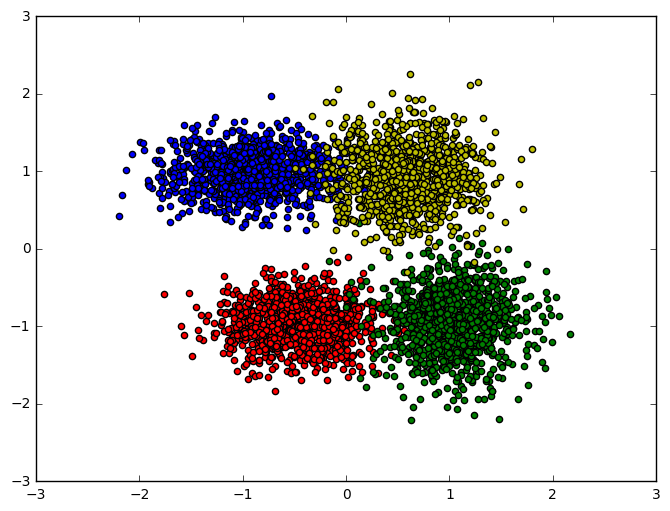

In [46]:
x_ = data
y_ = np.arange(4)
e_ = np.random.normal(size=(x_.shape[0], enc_z))
mus, lvs = sess.run([mu, log_var], feed_dict={x: x_, e: e_})

fig = plt.figure(figsize=(8, 6));
c = ['r', 'g', 'b', 'y']
for i, (m, v) in enumerate(zip(mus, lvs)):
    d = np.random.multivariate_normal(m, np.diag(np.exp(v)), size=1000)
    plt.scatter(d[:, 0], d[:, 1], c=c[i])
    plt.hold(True)
plt.show();

#### Posterior Visualization for GMM

Generate and show the data

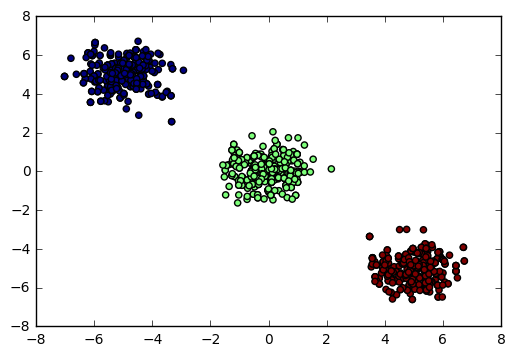

In [89]:
N = 1000
xs = np.vstack((
    np.random.multivariate_normal([-5, 5], np.eye(2)/2, size=N/3),
    np.random.multivariate_normal([0, 0], np.eye(2)/2, size=N/3),
    np.random.multivariate_normal([5, -5], np.eye(2)/2, size=N/3)
))
ys = np.repeat(np.arange(3), N/3)


idxs = np.random.choice(range(xs.shape[0]), xs.shape[0])
xs, ys = xs[idxs], ys[idxs]

plt.scatter(xs[:, 0], xs[:, 1], c=ys);

In [92]:
tf.reset_default_graph()

data = xs
data_dim = xs.shape[1]

enc_h = 128
enc_z = 2
dec_h = 128
max_iters = 10000
batch_size = 10
learning_rate = 0.001

x, e = inputs(data_dim, enc_z)
mu, log_var, z = encoder(x, e, data_dim, enc_h, enc_z)
out_op, out_mu, out_log_var = decoder(z, data_dim, dec_h, enc_z)
loss_op = make_loss(out_op, x, log_var, mu, out_log_var)
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss_op)

sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

idx = 0
for i in xrange(max_iters):
    x_ = data[idx:idx+batch_size]
    l = train_step(sess, x_, train_op, loss_op, x, e, enc_z)
    idx += batch_size
    if idx >= x_.shape[0]:
        idx = 0
    if i % 1000 == 0:
        print('iter: %d\tloss: %.2f' % (i, l))

iter: 0	loss: 109.20
iter: 1000	loss: 89.18
iter: 2000	loss: 90.88
iter: 3000	loss: 89.46
iter: 4000	loss: 89.29
iter: 5000	loss: 88.96
iter: 6000	loss: 89.15
iter: 7000	loss: 88.88
iter: 8000	loss: 88.88
iter: 9000	loss: 88.87


Choose a data point from each class, forward to get posterior parameters, and plot corresponding posterior samples

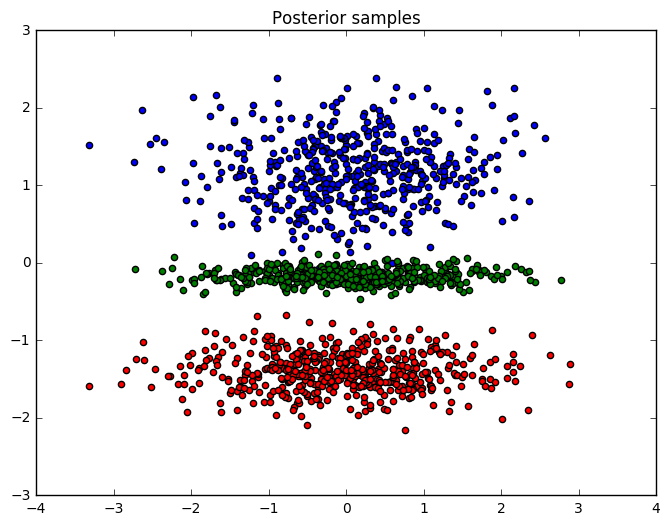

In [93]:
# Take a data point from each class
x_ = data[[(ys==i).argmax() for i in range(3)]]
y_ = np.arange(3)
e_ = np.random.normal(size=(x_.shape[0], enc_z))
mus, lvs = sess.run([mu, log_var], feed_dict={x: x_, e: e_})

fig = plt.figure(figsize=(8, 6));
c = ['b', 'g', 'r']
for i, (m, v) in enumerate(zip(mus, lvs)):
    d = np.random.multivariate_normal(m, np.diag(np.exp(v)), size=500)
    plt.scatter(d[:, 0], d[:, 1], c=c[i])
    plt.hold(True)

plt.title("Posterior samples")
plt.show();